<a href="https://colab.research.google.com/github/muskangurain/AIMLMonth2023/blob/main/Image_Classification_RESNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# daatset api
!kaggle competitions download -c cifar-10

 97% 696M/715M [00:03<00:00, 121MB/s] 
100% 715M/715M [00:03<00:00, 210MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [7]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.9/429.9 kB 17.2 MB/s eta 0:00:00


In [9]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [10]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies

In [11]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [12]:
filenames = os.listdir('/content/train')

In [13]:
type(filenames)

list

In [14]:
len(filenames)

50000

In [15]:
print(filenames[0:5])
print(filenames[-5:])

['23369.png', '39995.png', '46606.png', '2054.png', '36847.png']
['7385.png', '21354.png', '39495.png', '44275.png', '20164.png']


**Labels Processing**

In [16]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [17]:
labels_df.shape

(50000, 2)

In [18]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [19]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [20]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [21]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [22]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [23]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [56]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [25]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


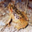

In [26]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

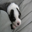

In [27]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [28]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [29]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [24]:
id_list = list(labels_df['id'])

In [31]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [25]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [26]:
type(data)

list

In [27]:
len(data)

50000

In [48]:
type(data[0])

numpy.ndarray

In [49]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
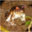

In [50]:
data[0]

In [57]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [58]:
type(X)

numpy.ndarray

In [59]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [62]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [63]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]], dtype=uint8)
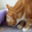

In [64]:
X_train[0]

**Building the Neural Network**

In [98]:
import tensorflow as tf
from tensorflow import keras

In [104]:
num_of_classes = 10

# setting up the layers of Neural Network
simple_cnn = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [105]:
# compile the neural network
simple_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [108]:
# training the neural network
simple_cnn.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - acc: 0.3710 - loss: 1.7539 - val_acc: 0.3692 - val_loss: 1.7416
Epoch 2/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.3829 - loss: 1.7317 - val_acc: 0.3945 - val_loss: 1.7091
Epoch 3/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - acc: 0.3934 - loss: 1.7128 - val_acc: 0.3968 - val_loss: 1.7041
Epoch 4/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.3930 - loss: 1.6997 - val_acc: 0.3877 - val_loss: 1.7265
Epoch 5/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - acc: 0.3952 - loss: 1.7080 - val_acc: 0.3993 - val_loss: 1.7073
Epoch 6/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.3989 - loss: 1.6974 - val_acc: 0.3950 - val_loss: 1.6988
Epoch 7/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - acc: 0.3999 - loss: 1.6984 - val_acc: 0.3947 - val_loss: 1.6946
Epoch 8/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.4042 - loss: 1.6737 - val_acc: 0.3890 - val_loss: 1.7175
Epoch 9/20
1125/1125 ━━━━━━━━━━━━━━━━━━━

In [109]:
from tensorflow.keras.datasets import cifar10

# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normalize (important!)
x_train = x_train / 255.0
x_test = x_test / 255.0


In [113]:
test_loss, test_acc = simple_cnn.evaluate(X_test_scaled, Y_test, verbose=1)
print("Test Accuracy:", test_acc * 100, "%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.4078 - loss: 1.6783
Test Accuracy: 41.33000075817108 %


In [111]:
y_pred = simple_cnn.predict(x_test)
y_pred_labels = y_pred.argmax(axis=1)     # convert probabilities → labels
y_true = y_test.flatten()                 # convert shape (10000,1) → (10000,)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [114]:
print(simple_cnn)



<Sequential name=sequential_4, built=True>


In [115]:
from sklearn.metrics import f1_score


f1_macro = f1_score(y_true, y_pred_labels, average='macro')
f1_weighted = f1_score(y_true, y_pred_labels, average='weighted')

print("F1 Score (Macro):", f1_macro)
print("F1 Score (Weighted):", f1_weighted)


F1 Score (Macro): 0.34994976720559395
F1 Score (Weighted): 0.34994976720559395


In [116]:
from sklearn.metrics import roc_auc_score
import numpy as np

# One-hot encode true labels
from tensorflow.keras.utils import to_categorical
y_true_onehot = to_categorical(y_true, num_classes=10)

auc_score = roc_auc_score(y_true_onehot, y_pred, multi_class='ovr')
print("AUC Score (OvR):", auc_score)


AUC Score (OvR): 0.8120302555555556


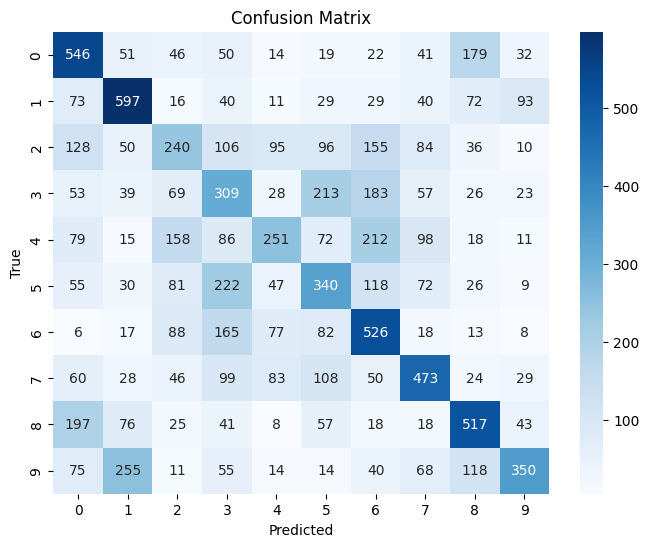

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


**ResNet50**

In [97]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [119]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [120]:
num_of_classes = 10


resnet_model = models.Sequential()
resnet_model.add(layers.UpSampling2D((2,2)))
resnet_model.add(layers.UpSampling2D((2,2)))
resnet_model.add(layers.UpSampling2D((2,2)))
resnet_model.add(convolutional_base)
resnet_model.add(layers.Flatten())
resnet_model.add(layers.BatchNormalization())
resnet_model.add(layers.Dense(128, activation='relu'))
resnet_model.add(layers.Dropout(0.5))
resnet_model.add(layers.BatchNormalization())
resnet_model.add(layers.Dense(64, activation='relu'))
resnet_model.add(layers.Dropout(0.5))
resnet_model.add(layers.BatchNormalization())
resnet_model.add(layers.Dense(num_of_classes, activation='softmax'))

In [121]:
resnet_model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = resnet_model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
   2/1125 ━━━━━━━━━━━━━━━━━━━━ 10:46:46 35s/step - acc: 0.1328 - loss: 2.7336

In [63]:
loss, accuracy = resnet_model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 115ms/step - acc: 0.9374 - loss: 0.2697
Test Accuracy = 0.9394000172615051


In [75]:
y_pred = resmet_model.predict(x_test)
y_pred_labels = y_pred.argmax(axis=1)     # convert probabilities → labels
y_true = y_test.flatten()                 # convert shape (10000,1) → (10000,)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [95]:
print(resnet_model)

<Sequential name=sequential_1, built=True>


In [96]:
[x for x in globals().keys() if "res" in x.lower()]


[]

In [85]:
from sklearn.metrics import f1_score

f1_macro = f1_score(y_true, y_pred_labels, average='macro')
f1_weighted = f1_score(y_true, y_pred_labels, average='weighted')

print("F1 Score (Macro):", f1_macro)
print("F1 Score (Weighted):", f1_weighted)


F1 Score (Macro): 0.4103785212032335
F1 Score (Weighted): 0.4103785212032335


In [78]:
from sklearn.metrics import roc_auc_score
import numpy as np

# One-hot encode true labels
from tensorflow.keras.utils import to_categorical
y_true_onehot = to_categorical(y_true, num_classes=10)

auc_score = roc_auc_score(y_true_onehot, y_pred, multi_class='ovr')
print("AUC Score (OvR):", auc_score)



AUC Score (OvR): 0.8402666111111111


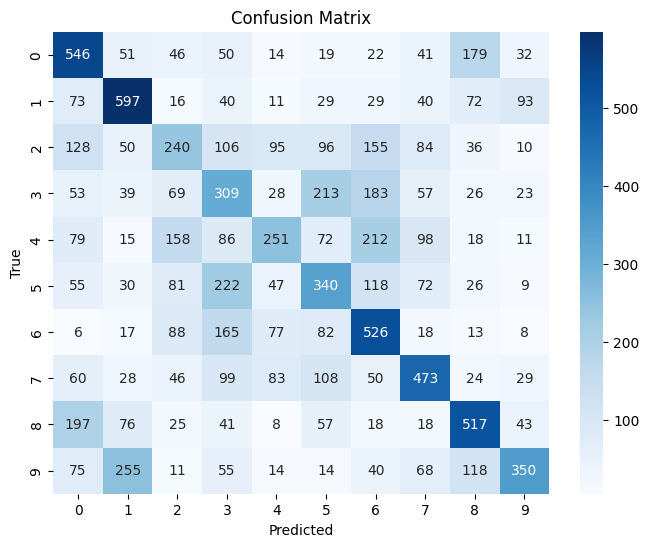

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


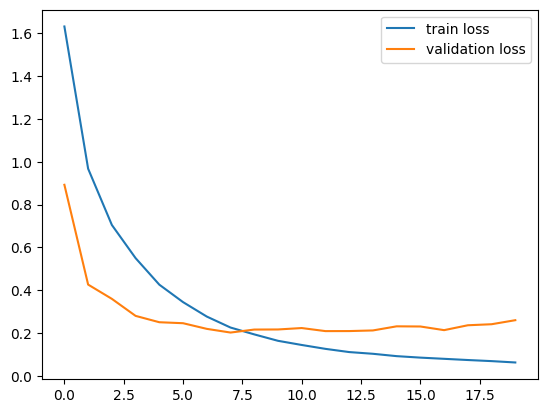

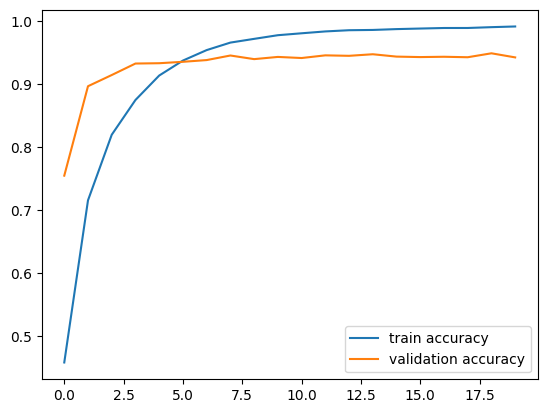

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()